HOUSE PRICE PREDICTION

Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

Read the data

In [ ]:
# reading the dataset
house = pd.read_csv("train.csv")

In [ ]:
# view first five rows
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# rows and columns
house.shape

(1460, 81)

In [ ]:
# summary of the dataset: 1460 rows, 81 columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# summary statistics of numeric columns
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#checking which columns have more than 70% NULL values
for column in house.columns:
    if round(100 * (house[column].isnull().sum()/len(house[column].index)), 2) > 70:
        print(column+" "+str(round(100 * (house[column].isnull().sum()/len(house[column].index)), 2)))

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


In [ ]:
# Eliminate the columns having more than 70% NULL values
house = house.drop(house.loc[:,list(round(100 * (house.isnull().sum()/len(house.index)),2) > 70)].columns,1)

In [ ]:
# check the variance of each column
house.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

In [ ]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# data type of numeric columns
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [ ]:
# Show 25th , 50th , 75th , 90th , 95th and 99th percentiles 
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [ ]:
#plt.boxplot(house['LotFrontage'])
# We will cap the values to the 95th percentile
# percentile_95 = house["LotFrontage"].quantile([0.05,0.95]).values
#percentile_95
#house["LotFrontage"][house["LotFrontage"] <= percentile_95[0]] = percentile_95[0]
#house["LotFrontage"][house["LotFrontage"] >= percentile_95[1]] = percentile_95[1]
#plt.figure(figsize=(10,6))
#sns.boxplot(house["LotFrontage"])

In [ ]:
# show the variance of each columns
house.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

(1453, 77)

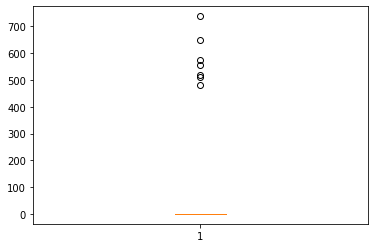

In [ ]:
# outlier treatment
plt.boxplot(house['PoolArea'])
P1 = house['PoolArea'].quantile(0.1)
P9 = house['PoolArea'].quantile(0.9)
P19 = P9 - P1
house = house[(house['PoolArea'] >= P1 - 1.5*P19) & 
                      (house['PoolArea'] <= P9 + 1.5*P19)]
house.shape
#plt.boxplot(house['PoolArea'])
# We will cap the values to the 95th percentile
#percentile_95 = house["PoolArea"].quantile([0.05,0.95]).values
#percentile_95
#house["PoolArea"][house["PoolArea"] <= percentile_95[0]] = percentile_95[0]
#house["PoolArea"][house["PoolArea"] >= percentile_95[1]] = percentile_95[1]
#plt.figure(figsize=(10,6))
#sns.boxplot(house["PoolArea"])

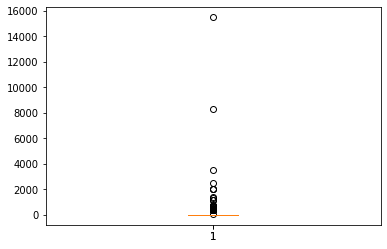

In [ ]:
#outlier treatment
plt.boxplot(house['MiscVal'])
P1 = house['MiscVal'].quantile(0.1)
P9 = house['MiscVal'].quantile(0.9)
P19 = P9 - P1
house = house[(house['MiscVal'] >= P1 - 1.5*P19) & 
                   (house['MiscVal'] <= P9 + 1.5*P19)]
house.shape
plt.boxplot(house['MiscVal'])
plt.show()

In [ ]:
# outlier treatment
#plt.boxplot(house['ScreenPorch'])
P1 = house['ScreenPorch'].quantile(0.1)
P9 = house['ScreenPorch'].quantile(0.9)
IQR = P9 - P1
house = house[(house['ScreenPorch'] >= P1 - 1.5*P19) & 
                     (house['ScreenPorch'] <= P9 + 1.5*P19)]
house.shape

(1291, 77)

(1274, 77)

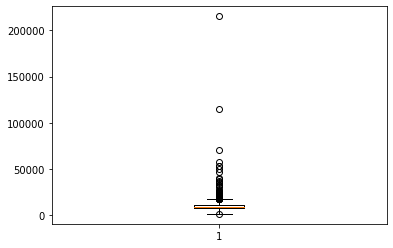

In [ ]:
# outlier treatment
plt.boxplot(house['LotArea'])
P1 = house['LotArea'].quantile(0.1)
P9 = house['LotArea'].quantile(0.9)
P19 = P9 - P1
house = house[(house['LotArea'] >= P1 - 1.5*P19) & 
                     (house['LotArea'] <= P9 + 1.5*P19)]
house.shape

In [ ]:
#plt.boxplot(house['MasVnrArea'])
#house.shape

In [ ]:
# outlier treatment
#plt.boxplot(house['MasVnrArea'])
P1 = house['MasVnrArea'].quantile(0.1)
P9 = house['MasVnrArea'].quantile(0.9)
P19 = P9 - P1
house = house[(house['MasVnrArea'] >= P1 - 1.5*P19) & 
                      (house['MasVnrArea'] <= P9 + 1.5*P19)]
house.shape

(1255, 77)

(1253, 77)

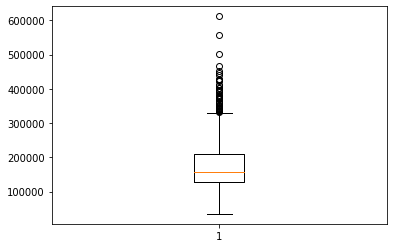

In [ ]:
# outlier treatment
plt.boxplot(house['SalePrice'])
P1 = house['SalePrice'].quantile(0.1)
P9 = house['SalePrice'].quantile(0.9)
P19 = P9 - P1
house = house[(house['SalePrice'] >= P1 - 1.5*P19) & 
                      (house['SalePrice'] <= P9 + 1.5*P19)]
house.shape

In [ ]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


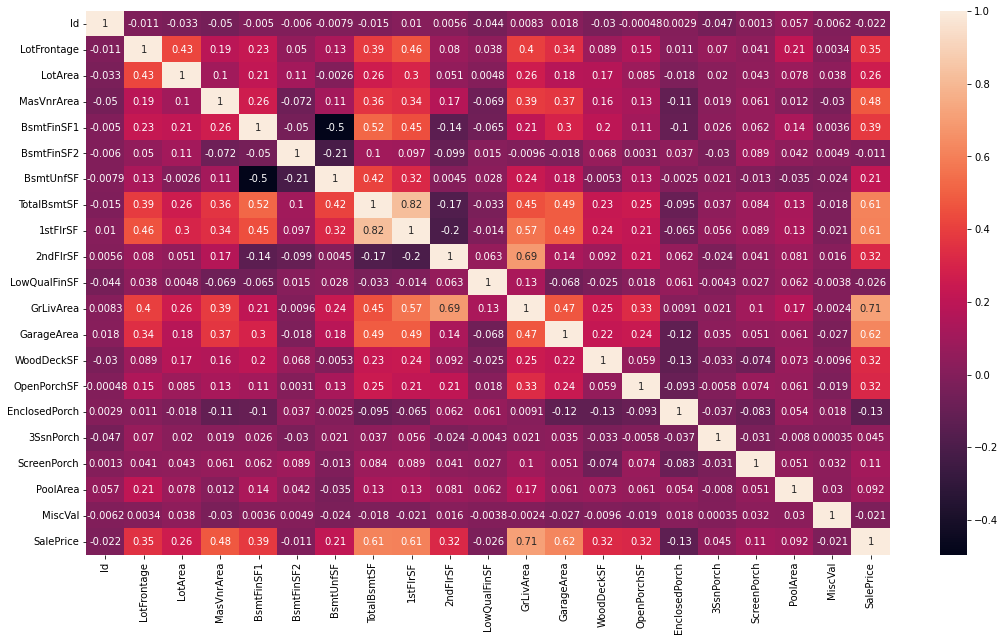

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
# Data type of columns
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   LotShape       1253 non-null   object 
 7   LandContour    1253 non-null   object 
 8   Utilities      1253 non-null   object 
 9   LotConfig      1253 non-null   object 
 10  LandSlope      1253 non-null   object 
 11  Neighborhood   1253 non-null   object 
 12  Condition1     1253 non-null   object 
 13  Condition2     1253 non-null   object 
 14  BldgType       1253 non-null   object 
 15  HouseStyle     1253 non-null   object 
 16  OverallQual    1253 non-null   int64  
 17  OverallCond    1253 non-null   int64  
 18  YearBuil

In [ ]:
#checking the number of null values in the dataset
house.isnull().sum()  

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [ ]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 77, dtype: float64

In [ ]:
#NA in Alley column means No Alley, so we will replace NA by it.
#house['Alley'].fillna('No Alley', inplace=True)

In [ ]:
#NA in MasVnrType column means None so we will replace NA by it.
house['MasVnrType'].fillna('None', inplace=True) 

In [ ]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [ ]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
#house['PoolQC'].fillna('No Pool', inplace=True) 
house['LotFrontage'].value_counts()

60.0     132
70.0      60
80.0      60
50.0      51
75.0      47
        ... 
140.0      1
174.0      1
33.0       1
112.0      1
46.0       1
Name: LotFrontage, Length: 105, dtype: int64

In [ ]:
#NA in Fence column means No Fence, so we will replace NA by it.
#house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].value_counts()

0.0      750
72.0       8
108.0      7
16.0       6
340.0      6
        ... 
89.0       1
333.0      1
594.0      1
219.0      1
119.0      1
Name: MasVnrArea, Length: 290, dtype: int64

In [ ]:
# Fill null values with 0 which has the maximum frequency
house['MasVnrArea'].fillna(0, inplace=True) 

In [ ]:
# Fill null values with 0 which has the maximum frequency
house['LotFrontage'].fillna(0, inplace=True) 

In [ ]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [ ]:
# Check for null values
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [ ]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [ ]:
# Check rows and columns
house.shape

(1253, 77)

In [ ]:
# Keep a copy of house in final
final=house

In [ ]:
# Converting street to numeric
final['Street'] = final['Street'].map({'Pave': 1, "Grvl": 0})

In [ ]:
# Converting Utilities to numeric
final['Utilities'] = final['Utilities'].map({'AllPub': 1, "NoSeWa": 0})

In [ ]:
# Converting CentralAir to numeric
final['CentralAir'] = final['CentralAir'].map({'Y': 1, "N": 0})

In [ ]:
# split into X and y
X = final.drop([ 'Id'], axis=1)

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,1,Gd,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,1,TA,Attchd,RFn,3,TA,TA,Y,WD,Normal


In [ ]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# drop categorical variables 
final = final.drop(list(house_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
final = pd.concat([final, house_dummies], axis=1)

In [ ]:
final.shape

(1253, 294)

In [ ]:
# Split X(features) and y(response)
X = final.drop([ 'Id'], axis=1)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [ ]:
# Impute any missing value using interpolate
X = X.fillna(X.interpolate())

In [ ]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}



ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
           
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)

{'alpha': 4.0}


In [ ]:
# Ridge regression with best value of alpha
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=4)

In [ ]:
# Lets calculate some metrics such as R2 score, SSE and MSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_rr = metrics.r2_score(y_train, y_pred_train)
print('Train R2 score:' , r2_train_rr)
metric2.append(r2_train_rr)

r2_test_rr = metrics.r2_score(y_test, y_pred_test)
print('Test R2 score:' , r2_test_rr)
metric2.append(r2_test_rr)

rss1_rr = np.sum(np.square(y_train - y_pred_train))
print('Train SSE is:' , rss1_rr)
metric2.append(rss1_rr)

rss2_rr = np.sum(np.square(y_test - y_pred_test))
print('Test SSE is:' , rss2_rr)
metric2.append(rss2_rr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print('Train MSE is:' , mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print('Test MSE is:' ,mse_test_lr)
metric2.append(mse_test_lr)

Train R2 score: 0.9534666371692674
Test R2 score: 0.8886067638566665
Train SSE is: 5.79291682238229
Test SSE is: 7.099186244616441
Train MSE is: 0.006605378360755177
Test MSE is: 0.018880814480362877


Lasso

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
# Run Lasso with best value of Alpha
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [ ]:
#lasso.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, SSE and MSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print('Train R2 score is:' , r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print('Test R2 score is:' ,r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train SSE is:' , rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test SSE is:' , rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print('Train MSE is:',mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print('Test MSE is:',mse_test_lr)
metric3.append(mse_test_lr)

Train R2 score is: 0.9566277112710513
Test R2 score is: 0.8850357308122668
Train SSE is: 5.399396169090338
Test SSE is: 7.326771235820509
Train MSE is: 0.006156666099304832
Test MSE is: 0.01948609371228859


In [ ]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','SSE (Train)','SSE (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2,
        'Lasso Regression': metric3
        }
lr_metric = pd.DataFrame(lr_table )
lr_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.953467,0.956628
1,R2 Score (Test),0.888607,0.885036
2,SSE (Train),5.792917,5.399396
3,SSE (Test),7.099186,7.326771
4,MSE (Train),0.006605,0.006157
5,MSE (Test),0.018881,0.019486


Running Ridge regression with double value of alpha

In [ ]:
alpha = 8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=8)

In [ ]:
# Lets calculate some metrics such as R2 score, SSE and MSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric4 = []
r2_train_rr = metrics.r2_score(y_train, y_pred_train)
print('Train R2 score is:',r2_train_rr)
metric4.append(r2_train_rr)

r2_test_rr = metrics.r2_score(y_test, y_pred_test)
print('Test R2 is:' ,r2_test_rr)
metric4.append(r2_test_rr)

rss1_rr = np.sum(np.square(y_train - y_pred_train))
print('Train SSE is:' ,rss1_rr)
metric4.append(rss1_rr)

rss2_rr = np.sum(np.square(y_test - y_pred_test))
print('Test SSE is:' ,rss2_rr)
metric4.append(rss2_rr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print('Train MSE is:' ,mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print('Test MSE is:' , mse_test_lr)
metric4.append(mse_test_lr)

Train R2 score is: 0.9496049791288677
Test R2 is: 0.8861470431116972
Train SSE is: 6.2736528462517
Test SSE is: 7.25594635216745
Train MSE is: 0.007153538023092018
Test MSE is: 0.019297729660019813


Run Lasso with double value of alpha

In [ ]:
alpha = 0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric5 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print('Train R2 score is:' , r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print('Test R2 score is:' ,r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train SSE is:',rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test SSE is:' ,rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print('Train MSE is:',mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print('Test MSE is:',mse_test_lr)
metric5.append(mse_test_lr)

Train R2 score is: 0.9526378578310093
Test R2 score is: 0.8857118006033893
Train SSE is: 5.8960911789853645
Test SSE is: 7.283684729604266
Train MSE is: 0.006723023009105319
Test MSE is: 0.019371501940436877


In [ ]:
lr2_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','SSE (Train)','SSE (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2,
        'Lasso Regression': metric3,
        'Ridge2 Regression': metric4,
        'Lasso2 Regression': metric5,
        }
lr2_metric = pd.DataFrame(lr2_table )
lr2_metric

,Metric,Ridge Regression,Lasso Regression,Ridge2 Regression,Lasso2 Regression
0,R2 Score (Train),0.953467,0.956628,0.949605,0.952638
1,R2 Score (Test),0.888607,0.885036,0.886147,0.885712
2,SSE (Train),5.792917,5.399396,6.273653,5.896091
3,SSE (Test),7.099186,7.326771,7.255946,7.283685
4,MSE (Train),0.006605,0.006157,0.007154,0.006723
5,MSE (Test),0.018881,0.019486,0.019298,0.019372


In [ ]:
#important predictor variables of ridge
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
#betas['Lasso2'] = lasso2.coef_
#betas['Lasso'] = lasso.coef_
#pd.set_option('display.max_rows', None)
final_betas = betas.sort_values(by=['Ridge'], ascending=False)
final_betas.head(10)

,Ridge2,Ridge
OverallCond_9,0.079698,0.102376
Neighborhood_Crawfor,0.081568,0.095012
OverallQual_9,0.077819,0.094480
OverallCond_8,0.073737,0.086819
Neighborhood_StoneBr,0.064040,0.085091
Exterior1st_BrkFace,0.068517,0.078402
MSZoning_FV,0.055296,0.072482
Functional_Typ,0.062206,0.063344
OverallCond_7,0.057597,0.062428
OverallQual_8,0.048136,0.058619


Top Five Predictors Ridge are
- OverallCond_9
- Neighborhood_Crawfor
- OverallQual_9
- OverallCond_8
- Neighborhood_StoneBr

In [ ]:
#important predictor variables of ridge2
ridge2_coeff = pd.DataFrame({'Ridge2':ridge2.coef_},index=X_train.columns)
final_coeff = ridge2_coeff.sort_values(by=['Ridge2'], ascending=False)
final_coeff.head(10)

,Ridge2
Neighborhood_Crawfor,0.081568
OverallCond_9,0.079698
OverallQual_9,0.077819
OverallCond_8,0.073737
Exterior1st_BrkFace,0.068517
Neighborhood_StoneBr,0.064040
Functional_Typ,0.062206
OverallCond_7,0.057597
MSZoning_FV,0.055296
BsmtExposure_Gd,0.049131


In [ ]:
#important predictor variables of Lasso
lasso_coeff = pd.DataFrame({'Lasso':lasso.coef_,'Lasso2':lasso2.coef_},index=X_train.columns)
final_coeff = lasso_coeff.sort_values(by=['Lasso'], ascending=False)
final_coeff.head(10)

,Lasso,Lasso2
OverallQual_10,0.180721,0.127948
OverallQual_9,0.171465,0.140863
OverallCond_9,0.133554,0.123125
FullBath_3,0.129624,0.012800
BsmtFullBath_2,0.121623,0.082463
Neighborhood_Crawfor,0.117900,0.117366
Neighborhood_StoneBr,0.117538,0.104996
SaleType_Oth,0.112528,0.066680
RoofMatl_Tar&Grv,0.108509,0.043070
OverallQual_8,0.106858,0.068240


Top Five Predictors are
- OverallQual_10
- OverallQual_9
- OverallCond_9
- FullBath_3
- BsmtFullBath_2


In [ ]:
#important predictor variables of Lasso2
lasso2_coeff = pd.DataFrame({'Lasso':lasso.coef_,'Lasso2':lasso2.coef_},index=X_train.columns)
final_coeff = lasso2_coeff.sort_values(by=['Lasso2'], ascending=False)
final_coeff.head(10)

,Lasso,Lasso2
OverallQual_9,0.171465,0.140863
OverallQual_10,0.180721,0.127948
OverallCond_9,0.133554,0.123125
Neighborhood_Crawfor,0.117900,0.117366
Neighborhood_StoneBr,0.117538,0.104996
OverallCond_8,0.093248,0.090080
BsmtFullBath_2,0.121623,0.082463
MSZoning_FV,0.089265,0.082354
Exterior1st_BrkFace,0.085403,0.080957
OverallQual_8,0.106858,0.068240


In [ ]:
#Drop the above 5 variables of Lasso from x_train
X_train_excluding_top_5 = X_train.drop(['OverallQual_10','OverallQual_9',
                                        'OverallCond_9','FullBath_3','BsmtFullBath_2'],axis=1)

#Lasso regression model
lasso_excluding_top_5 = Lasso(alpha=0.0001)   
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(X_train_excluding_top_5, y_train)

#Ridge regression model
#ridge_excluding_top_5 = Ridge(alpha=4)   
#ridge_excluding_top_5_model = ridge_excluding_top_5.fit(X_train_excluding_top_5, y_train)

In [ ]:
df_excluding_top_5 = pd.DataFrame({'Lasso5':lasso_excluding_top_5_model.coef_},
                                  index = X_train_excluding_top_5.columns)

In [ ]:
df_excluding_top_5_sort = df_excluding_top_5.sort_values(by=['Lasso5'], ascending=False)
df_excluding_top_5_sort.head(10)

,Lasso5
SaleType_Oth,0.159851
Neighborhood_StoneBr,0.122142
Neighborhood_Crawfor,0.110341
RoofMatl_Tar&Grv,0.098209
MSZoning_FV,0.094939
Condition2_PosA,0.093762
Exterior1st_BrkFace,0.089220
Neighborhood_NPkVill,0.088059
SaleType_ConLD,0.085779
Exterior1st_Stucco,0.074766


Top Five Predictors after Removing intial top 5:
- SaleType_Oth
- Neighborhood_StoneBr
- Neighborhood_Crawfor
- RoofMatl_Tar&Grv
- MSZoning_FV